<a href="https://colab.research.google.com/github/pathilink/triggo-ai_case/blob/main/notebook/triggo_ai_business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triggo.ai Technical Test [Business Problems]

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/test/triggo-ai/full_df.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,1.0,credit_card,1.0,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,2.0,voucher,1.0,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000,2017-10-02 11:07:15.000000,2017-10-04 19:55:00.000000,2017-10-10 21:25:13.000000,2017-10-18 00:00:00.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23,-46,3.0,voucher,1.0,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.000000,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00.000000,2017-10-12 03:43:48.000000,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,-23,-46
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.000000,2018-07-26 03:24:27.000000,2018-07-26 14:31:00.000000,2018-08-07 15:27:45.000000,2018-08-13 00:00:00.000000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12,-45,1.0,boleto,1.0,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27.000000,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00.000000,2018-08-08 18:37:50.000000,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,-19,-43
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.000000,2018-07-26 03:24:27.000000,2018-07-26 14:31:00.000000,2018-08-07 15:27:45.000000,2018-08-13 00:00:00.000000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12,-44,1.0,boleto,1.0,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27.000000,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00.000000,2018-08-08 18:37:50.000000,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,-19,-43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149548 entries, 0 to 149547
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       149548 non-null  object 
 1   customer_id                    149548 non-null  object 
 2   order_status                   149548 non-null  object 
 3   order_purchase_timestamp       149548 non-null  object 
 4   order_approved_at              149531 non-null  object 
 5   order_delivered_carrier_date   147982 non-null  object 
 6   order_delivered_customer_date  146325 non-null  object 
 7   order_estimated_delivery_date  149548 non-null  object 
 8   customer_unique_id             149548 non-null  object 
 9   customer_zip_code_prefix       149548 non-null  int64  
 10  customer_city                  149548 non-null  object 
 11  customer_state                 149548 non-null  object 
 12  customer_lat                  

## Preparation

In [5]:
df_ = df.copy()

In [6]:
# alter str -> timestamp
cols_to_convert = ['order_purchase_timestamp',
                   'order_approved_at',
                   'order_delivered_carrier_date',
                   'order_delivered_customer_date',
                   'order_estimated_delivery_date',
                   'shipping_limit_date',
                   'review_creation_date',
                   'review_answer_timestamp']

df_[cols_to_convert] = df_[cols_to_convert].apply(pd.to_datetime, errors='coerce')
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149548 entries, 0 to 149547
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       149548 non-null  object        
 1   customer_id                    149548 non-null  object        
 2   order_status                   149548 non-null  object        
 3   order_purchase_timestamp       149548 non-null  datetime64[ns]
 4   order_approved_at              149531 non-null  datetime64[ns]
 5   order_delivered_carrier_date   147982 non-null  datetime64[ns]
 6   order_delivered_customer_date  146325 non-null  datetime64[ns]
 7   order_estimated_delivery_date  149548 non-null  datetime64[ns]
 8   customer_unique_id             149548 non-null  object        
 9   customer_zip_code_prefix       149548 non-null  int64         
 10  customer_city                  149548 non-null  object        
 11  

In [7]:
# missing data
total = df_.isnull().sum().sort_values(ascending=False)
percent = (df_.isnull().sum()/df_.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
review_comment_title,131905,0.882025
review_comment_message,86435,0.577975
order_delivered_customer_date,3223,0.021552
product_description_lenght,2125,0.014209
product_category_name,2125,0.014209
product_photos_qty,2125,0.014209
product_name_lenght,2125,0.014209
order_delivered_carrier_date,1566,0.010472
review_score,1250,0.008359
review_id,1250,0.008359


In [8]:
# drop columns with high percentage of nulls
df_ = df_.drop(columns=['review_comment_title', 'review_comment_message'])

In [9]:
# drop null rows
df_ = df_.dropna()

## Business Problems

### Retention Analysis

*   **Recurring customer**: customer_unique_id with more than one order in the period analyzed.

$$
\text{Retention rate} = \frac{\text{Recurring customer}}{\text{Total customers}}
$$


In [10]:
total_customers = df_['customer_unique_id'].nunique()
total_customers

91038

In [11]:
recurring_customer = df_.groupby('customer_unique_id')['order_id'].nunique().reset_index() \
                        .query('order_id > 1')['customer_unique_id'].nunique()
recurring_customer

2686

In [12]:
retention_rate = recurring_customer / total_customers
print(f'Retention rate: {round(retention_rate * 100, 2)}%.')

Retention rate: 2.95%.


The low rate of customer recurrence (3%) may indicate the need:
* to look at the product / service offered
* a loyalty program

### Delay Prediction

* **Delivery delay**: delivery date longer than the estimated date.

In [13]:
df_delay = df_.query('order_status == "delivered"').copy()

In [14]:
df_delay['order_status'].unique()

array(['delivered'], dtype=object)

In [15]:
df_delay['delivery_delay'] = np.where(df_delay['order_estimated_delivery_date'] < df_delay['order_delivered_customer_date'], 1, 0)
df_delay['delivery_delay'].sample(5)

,delivery_delay
91623,0
81501,0
102942,1
77321,0
116741,0


In [16]:
# diff between order purchase and approve
df_delay['time_to_approve'] = (df_delay['order_approved_at'] - df_delay['order_purchase_timestamp']).dt.total_seconds() / 3600
df_delay['time_to_approve'].sample(5)

,time_to_approve
31706,0.351944
38705,0.211111
98526,34.258611
20823,7.179722
110023,3.293333


In [17]:
features = df_delay[[
    'customer_lat',
    'customer_lng',
    'payment_installments',
    'payment_value',
    'price',
    'freight_value',
    'product_name_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'seller_lat',
    'seller_lng',
    'time_to_approve'
    ]]

target = df_delay['delivery_delay']

In [18]:
# Model
# split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=18)

# train
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# prediction
y_pred = tree.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     39574
           1       0.55      0.00      0.00      3371

    accuracy                           0.92     42945
   macro avg       0.73      0.50      0.48     42945
weighted avg       0.89      0.92      0.88     42945



As the data is unbalanced, the classification model has learned to predict only the majority class (class 0, i.e. no delivery delay).

Class 0 (no delay):
* Precision: 0.92 → When the model says that delivery won't be delayed, it's right 92% of the time.
* Recall: 1.00 → The model finds 100% of delivery cases without delay.
* F1-score: 0.96 → Good balance between precision and recall.


Class 1 (with delay):
* Precision: 0.55 → Not good because is misleading as the base is unbalanced.

* Recall: 0.00 → The model hasn't identified any cases of delay.

* F1-score: 0.00 → The model is failing completely in class 1.

Overall accuracy: 92%
* Looks good, but is misleading because the vast majority of data is class 0 (no delay).

Macro avg:
* Takes both classes into account equally, even if they are unbalanced.

* Average recall: 0.50 → The model only hits one of the two classes.

### Customer Segmentation

In [19]:
# grouping by client

df_customer = df_.groupby('customer_unique_id').agg({
    'order_id': 'nunique',  # number of orders
    'payment_installments': 'mean', # average number of installments
    'payment_value': 'sum', # total amount spent
    'price': 'sum',         # total in products
    'freight_value': 'sum', # total freight costs
    'review_score': 'mean', # average of evaluations
    'order_purchase_timestamp': ['min', 'max'] # calculate recency
}).reset_index()

# rename columns
df_customer.columns = ['customer_id', 'num_orders', 'avg_installments', 'total_payment',
                       'total_price', 'total_freight', 'avg_review',
                       'first_purchase', 'last_purchase']

df_customer.head()

,customer_id,num_orders,avg_installments,total_payment,total_price,total_freight,avg_review,first_purchase,last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1,8.0,283.80,259.80,24.00,5.0,2018-05-10 10:56:27,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,27.19,18.90,8.29,4.0,2018-05-07 11:11:27,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,1,8.0,86.22,69.00,17.22,3.0,2017-03-10 21:05:03,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0,43.62,25.99,17.63,4.0,2017-10-12 20:29:41,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,1,6.0,196.89,180.00,16.89,5.0,2017-11-14 19:45:42,2017-11-14 19:45:42


In [20]:
# reference date for recency calculation
ref_date = df_['order_purchase_timestamp'].max()

# recency (in days) since last purchase
df_customer['recency_days'] = (ref_date - df_customer['last_purchase']).dt.days

# average frequency (days between first and last purchase)
df_customer['purchase_span_days'] = (df_customer['last_purchase'] - df_customer['first_purchase']).dt.days
df_customer['purchase_freq'] = df_customer['num_orders'] / (df_customer['purchase_span_days'] + 1)


In [21]:
features = df_customer[['num_orders', 'avg_installments', 'total_payment',
                        'total_price', 'total_freight', 'avg_review',
                        'recency_days', 'purchase_span_days', 'purchase_freq']]


In [22]:
# normalize data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',  n_init='auto', random_state=18)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

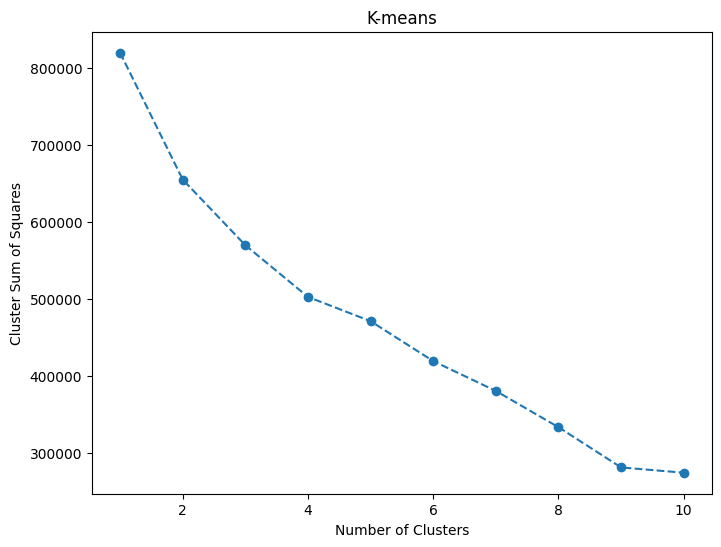

In [24]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Sum of Squares') # Sum of squares within the cluster
plt.title('K-means')
plt.show()

In [25]:
# apply kmeans
kmeans = KMeans(n_clusters=9, random_state=18)
df_customer['cluster'] = kmeans.fit_predict(features_scaled)

In [26]:
# size of each group
print(df_customer['cluster'].value_counts())

# stats by cluster
summary = df_customer.groupby('cluster').mean(numeric_only=True)
print(summary)


cluster
0    35355
3    25915
4    13489
8    12063
1     1568
6     1326
5      763
2      532
7       27
Name: count, dtype: int64
         num_orders  avg_installments  total_payment  total_price  \
cluster                                                             
0          1.000311          1.819906     164.390772   124.483684   
1          1.019133          5.139425    2849.268214  1785.137430   
2          2.283835          3.612770     553.585695   359.957218   
3          1.000232          2.004766     167.655263   127.992776   
4          1.000297          2.378333     234.536469   152.213714   
5          2.035387          3.494339     514.873526   321.998204   
6          2.085973          3.004756     487.222775   325.381735   
7          1.370370          5.333510   31203.410370  7698.992963   
8          1.000746          8.212399     401.992812   305.808458   

         total_freight  avg_review  recency_days  purchase_span_days  \
cluster                            

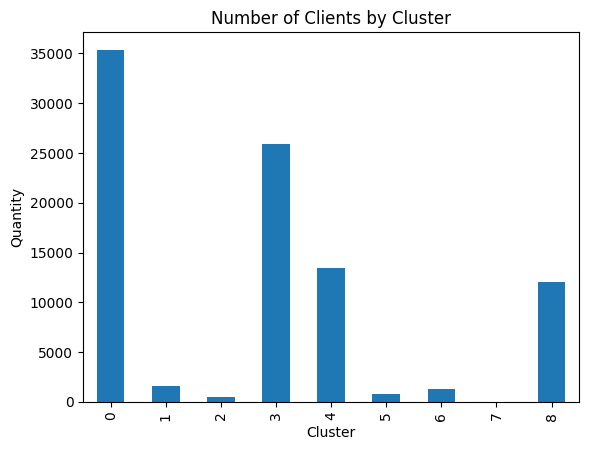

In [27]:
df_customer['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Clients by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.show()


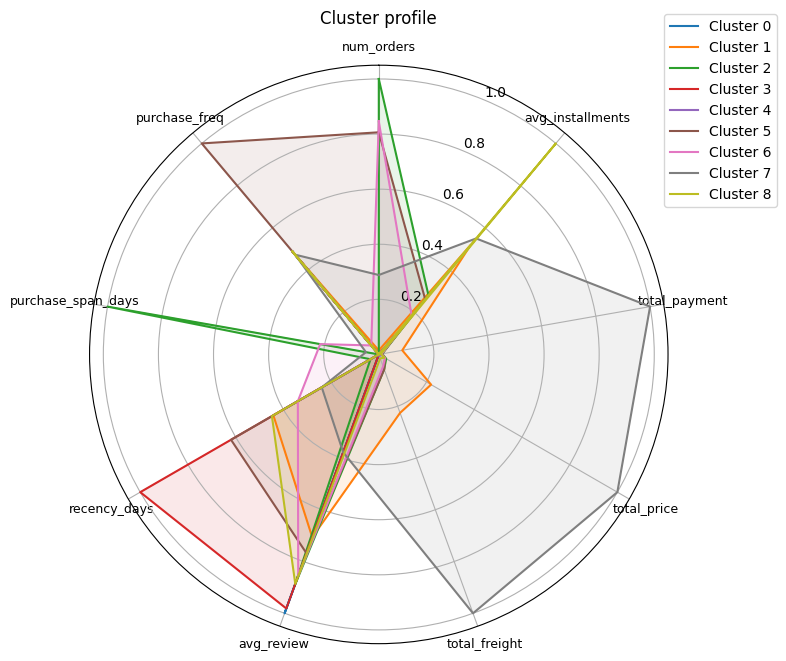

In [28]:
df_clustered = df_customer.groupby('cluster').mean(numeric_only=True)

# normalize
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustered),
                         index=df_clustered.index,
                         columns=df_clustered.columns)

# plot radar chart
labels = df_scaled.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_scaled.iterrows():
    values = row.tolist()
    values += values[:1]  # complete the circle
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_title("Cluster profile", pad=30)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


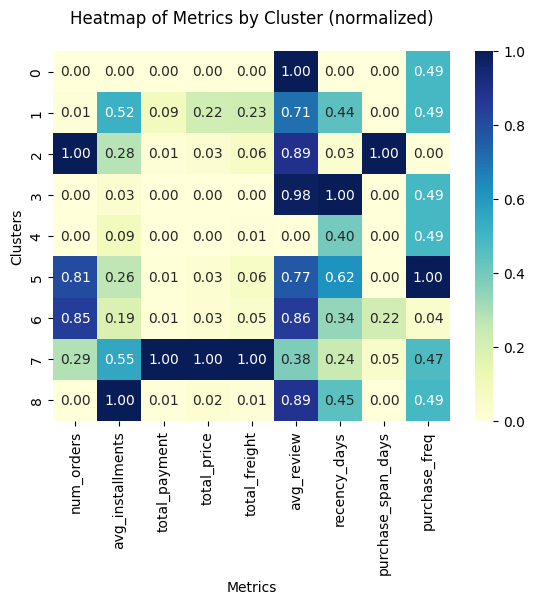

In [29]:
sns.heatmap(df_scaled, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Heatmap of Metrics by Cluster (normalized)", pad=20)
plt.xlabel("Metrics")
plt.ylabel("Clusters")
plt.show()


**Cluster 0**

Single purchase, low average ticket (\~R\$124), short installments (~2x), great rating (4.69) and recent. Punctual and satisfied customer profile.
<br><br>
**Cluster 1**

High-value buyer: very high average ticket (\~R\$1,785), high installments (\~5x), high shipping (\~R\$201) and moderate rating (3.81). More frequent purchases, but almost recurring. High-spending customer profile and reasonable frequency.
<br><br>
**Cluster 2**

Recurring, with an average of 2.3 orders, moderate values (\~R\$360), installments of \~3.6x, and a good rating (4.37). However, long time between purchases and low frequency (0.008). Profile of a customer who has bought more than once, but very sporadically.
<br><br>
**Cluster 3**

Single purchase, low value (\~R\$128), few installments (2x), excellent rating (4.64), but last purchase very old (recency of \~395 days). Satisfied but inactive customer profile.
<br><br>
**Cluster 4**

Single purchase and poorly rated: average ticket \~R\$152, low rating (1.67), few installments (\~2.4x), and high recency. Profile of a customer who bought once, didn't like it and never returned.
<br><br>
**Cluster 5**

Recurring customer, with 2 purchases on average, average total value (\~R\$322), reasonable rating (3.99), and high frequency (\~2). Engaged and active customer profile.
<br><br>
**Cluster 6**

Buyer with two purchases, similar values to cluster 5 (~$325), good evaluation (4.26), but long interval between purchases (span ~62 days) and low frequency. Potentially loyal customer profile, but with a slow pace.
<br><br>
**Cluster 7**

Premium customer: very high ticket (\~\$7,699), high installments (5x), very high shipping (\~\$804), but low rating (2.81). Few purchases (\~1.37), spaced out, but recent. High-value customer profile with low satisfaction.
<br><br>
**Cluster 8**

Single purchase, many installments (8x), average value (\~R\$306), good rating (4.35), and recent purchase. Profile of a new customer with potential, as they made a reasonable purchase and left satisfied.

### Satisfaction Analysis

In [30]:
df_review = df_.copy()

In [31]:
# delivery delay (in days)
df_review['delivery_delay_days'] = (df_review['order_delivered_customer_date'] - df_review['order_estimated_delivery_date']).dt.days

# real delivery time (in days): delivery days from purchase
df_review['delivery_time_days'] = (df_review['order_delivered_customer_date'] - df_review['order_purchase_timestamp']).dt.days

# categories of delay
df_review['delivered_late'] = df_review['delivery_delay_days'] > 0


In [32]:
# average overall score
df_review['review_score'].describe()

,review_score
count,143157.000000
mean,4.076720
std,1.349572
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
# average score per delay
df_review.groupby('delivered_late')['review_score'].mean()

,review_score
delivered_late,
False,4.205807
True,2.245093


In [34]:
# correlation between delivery time and delay
df_review[['delivery_time_days', 'review_score']].corr()


,delivery_time_days,review_score
delivery_time_days,1.000000,-0.308988
review_score,-0.308988,1.000000


In [35]:
mean_score_by_category = df_review.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
mean_score_by_category


,review_score
product_category_name,
fashion_roupa_infanto_juvenil,5.000000
cds_dvds_musicais,4.642857
livros_importados,4.595960
livros_interesse_geral,4.536953
portateis_casa_forno_e_cafe,4.505747
...,...
portateis_cozinha_e_preparadores_de_alimentos,3.533333
pc_gamer,3.500000
casa_conforto_2,3.437500


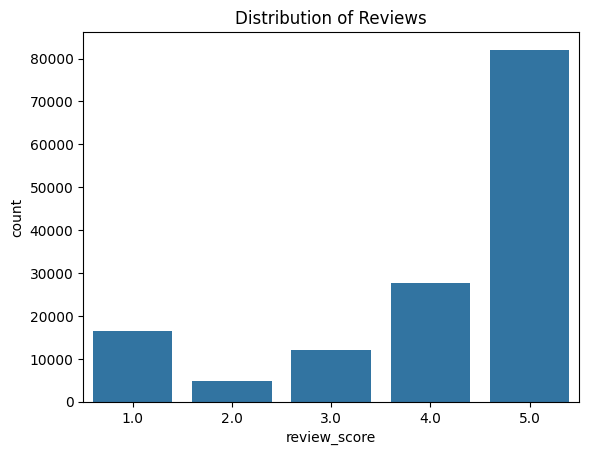

In [36]:
sns.countplot(data=df_review, x='review_score')
plt.title('Distribution of Reviews')
plt.show()

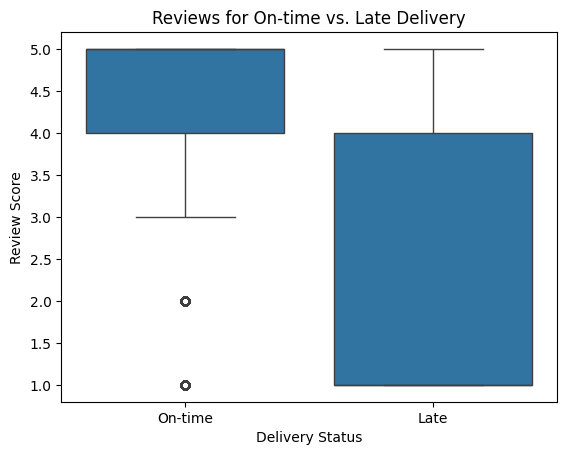

In [37]:
sns.boxplot(
    data=df_review.replace({'delivered_late': {False: 'On-time', True: 'Late'}}),
    x='delivered_late',
    y='review_score'
)
plt.title('Reviews for On-time vs. Late Delivery')
plt.xlabel('Delivery Status')
plt.ylabel('Review Score')
plt.show()

In [38]:
mean_score_by_category.reset_index()

,product_category_name,review_score
0,fashion_roupa_infanto_juvenil,5.000000
1,cds_dvds_musicais,4.642857
2,livros_importados,4.595960
3,livros_interesse_geral,4.536953
4,portateis_casa_forno_e_cafe,4.505747
...,...,...
68,portateis_cozinha_e_preparadores_de_alimentos,3.533333
69,pc_gamer,3.500000
70,casa_conforto_2,3.437500
71,fraldas_higiene,3.346939


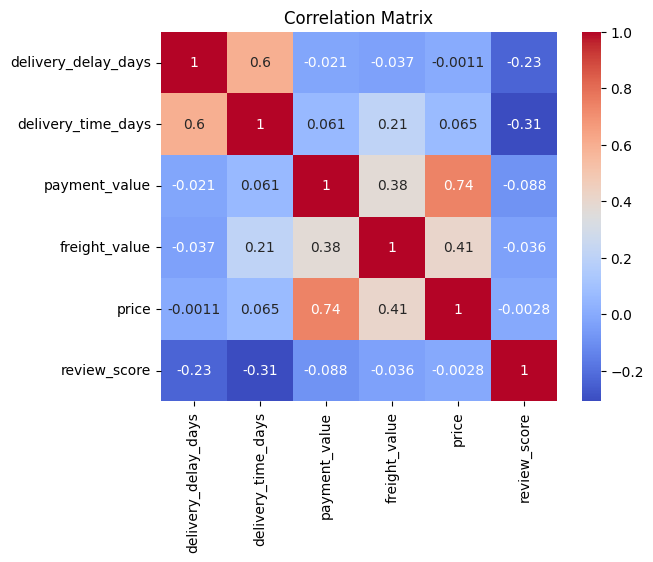

In [39]:
num_cols = ['delivery_delay_days', 'delivery_time_days', 'payment_value', 'freight_value', 'price', 'review_score']
corr = df_review[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


* Most of the ratings vary between 4 and 5 points.
* Orders that had a delay in delivery received lower reviews on average than those that arrived on time.
* Comparing the distributions of late deliveries (or not) with the reviews, the orders delivered without delay have some low reviews while the orders with delays had 75% of the reviews up to 4 points.
* The categories with the best scores are:
1. fashion_roupa_infanto_juvenil
2. cds_dvds_musicais
3. livros_importados
4. livros_interesse_geral
5. portateis_casa_forno_e_cafe
* The number of delivery days since the date of purchase has the greatest impact on the review score - correlation of -0.31.